In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.figureHeywood import FigureHeywood
from qtpg.search_manager import SearchManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt

In [2]:
gp_query_env = 0
rl_query_env = 0

In [3]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
# memoryRepeat = 0.0
goalReached = 100

# envName = 'Figure 13'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 9'
# env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
envName = 'Heywood'
env = FigureHeywood(10, 10, (4, 4), (0, 4), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

In [4]:
numGens = 200
# numGens = 30
maxTeamPool = 5
runs = 1
# init search manager and starting teams

# searchManager = SearchManager(maxTeamPool)

# variables for tracking fitness, for curves
scores = []
gens = []
maxes = []
averages = []
mins = []

run_winners = []
runs_score_track = []

for run in range(runs):
    maxes = []
    averages = []
    mins = []
    gens = []
    print(run)
    # init everything for new run
    searchManager = SearchManager(maxTeamPool)
    
    adam_and_eve = []
    env.reset()
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [2, 3])
    adam_and_eve.append(init_team)
#     init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
#     init_team.init_search(env, [0, 1])
#     adam_and_eve.append(init_team)
    win = False
    for adam in adam_and_eve:
        data = [adam, win]
        searchManager.evaluate_team(data)
    
    
    for gen in range(numGens):
        print('winners so far:')
        print(searchManager.winners)
        print(f'GEN --> {gen}')
    #     if win:
    #         print(f'got to --> gen {gen+1}')
    #         break
        toEvaluateAfterGen = []
        scores = []
#         print(f'>>>>>>>>>>>>>>>>>>>>>>>Gen {gen+1} start!>>>>>>>>>>>>>>>>>>>>>>>')
        # get it started
        for parent in searchManager.teamPool:
            # only run if the team has not yet won
            if parent not in searchManager.winners:
#                 print(f'Parent: {parent.id}')
        #             print(f'Start: {parent.start_state}')
                env.current_state = parent.start_state

                # make offspring from parent, then let that offspring make a new rule
                child = copy.deepcopy(parent)
                child.gp_query_env = parent.gp_query_env # probably don't need this, can test later
                child.id = uuid.uuid4()
                win = child.search_no_back_track(env)
                
                if child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2] >= 0:
                    gp_query_env += (child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2]) + 1
#                 print(f'Child: {child.id}')
#                 print('Start Child Regions --------')
#                 for learner in child.learners:
#                     print(learner.program.rule.region)
#                 print('End Child Regions --------')
#                 print(f'Child Fitness: {child.fitness}') 
                toEvaluateAfterGen.append([child, win])
                scores.append(child)
            else:
#                 print(f'Skipping Team: {parent.id}')
#                 print(parent.fitness)
                scores.append(parent)

        for data in toEvaluateAfterGen:
            searchManager.evaluate_team(data)
#         print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
#         print(f'End of Gen {gen+1} Regions')
#         for i in range(len(searchManager.teamPool)):
#             print(f'Team: {i+1} --> {searchManager.teamPool[i].fitness}')
#             for learner in searchManager.teamPool[i].learners:
#                 print(learner.program.rule.region)
#         print(f'>>>>>>>>>>>>>>>>>>>>>>>Gen {gen+1} end!>>>>>>>>>>>>>>>>>>>>>>>')
        # start: manage fitness curves (at end of gen)
        gens.append(gen)
        total = 0
        max_fitness = -100
        min_fitness = 100

        for team in scores:
            total += team.fitness
            if team.fitness > max_fitness:
                max_fitness = team.fitness
            if team.fitness < min_fitness:
                min_fitness = team.fitness
        average_fitness = total / len(searchManager.teamPool)
        maxes.append(max_fitness)
        averages.append(average_fitness)
        mins.append(min_fitness)

#         team_index = 0
#         for team in searchManager.teamPool:
#             team_index += 1
#             print(f'Team: {team_index} regions -- ', end='')
#             for learner in team.learners:
#                 print(f'{learner.program.rule.region}, ', end='')
#             print(f'fitness -- {team.fitness}')
#             print('')
    runs_score_track.append({'run': run, 'maxes': maxes, 'averages': averages, 'mins': mins})
        # end: manage fitness curves (at end of gen)
#     for team in searchManager.winners:
#         print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
#         print(team.fitness)
#         print('Learners:')
#         for learner in team.learners:
#             print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
#         print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')
    
    run_winners.append({'run': run, 'winners': searchManager.winners})

0
winners so far:
[]
GEN --> 0
winners so far:
[]
GEN --> 1
winners so far:
[]
GEN --> 2
winners so far:
[]
GEN --> 3
winners so far:
[]
GEN --> 4
winners so far:
[]
GEN --> 5
winners so far:
[]
GEN --> 6
winners so far:
[]
GEN --> 7
winners so far:
[]
GEN --> 8
winners so far:
[]
GEN --> 9
winners so far:
[]
GEN --> 10
winners so far:
[]
GEN --> 11
winners so far:
[]
GEN --> 12
winners so far:
[]
GEN --> 13
winners so far:
[]
GEN --> 14
winners so far:
[]
GEN --> 15
winners so far:
[]
GEN --> 16
winners so far:
[]
GEN --> 17
winners so far:
[]
GEN --> 18
winners so far:
[]
GEN --> 19
winners so far:
[]
GEN --> 20
winners so far:
[]
GEN --> 21
winners so far:
[]
GEN --> 22
winners so far:
[]
GEN --> 23
winners so far:
[]
GEN --> 24
winners so far:
[]
GEN --> 25
winners so far:
[]
GEN --> 26
winners so far:
[]
GEN --> 27
winners so far:
[]
GEN --> 28
winners so far:
[]
GEN --> 29
winners so far:
[]
GEN --> 30
winners so far:
[]
GEN --> 31
winners so far:
[]
GEN --> 32
winners so far:
[]

winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>]
GEN --> 139
winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>]
GEN --> 140
winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>]
GEN --> 141
winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>]
GEN --> 142
winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>]
GEN --> 143
winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>]
GEN --> 144
winners so far:
[<qtpg.team.Team object at 0x7f891b7

winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>, <qtpg.team.Team object at 0x7f891b9ae5b0>, <qtpg.team.Team object at 0x7f891b99afd0>]
GEN --> 198
winners so far:
[<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>, <qtpg.team.Team object at 0x7f891b9ae5b0>, <qtpg.team.Team object at 0x7f891b99afd0>]
GEN --> 199


In [5]:
#fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for average in averages:
#     y.append(average)
# plt.xlabel('Generation')
# plt.ylabel('Average Score')
# plt.plot(x, y)
# plt.show()

In [6]:
# #fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for max_ in maxes:
#     y.append(max_)
# plt.xlabel('Generation')
# plt.ylabel('Max Score')
# plt.plot(x, y)
# plt.show()

In [7]:
for team in searchManager.winners:
    print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
    print(team.fitness)
    print('Learners:')
    for learner in team.learners:
        print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
    print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$
162.79000000000005
Learners:
Region: [0, 0, 0, 0] --> Action: [2, 3]
Region: [0, 0, 2, 9] --> Action: [2, 3]
Region: [1, 1, 1, 9] --> Action: [0, 1]
Region: [0, 0, 0, 8] --> Action: [2, 3]
Region: [1, 9, 0, 7] --> Action: [0, 1]
Region: [1, 9, 9, 9] --> Action: [0, 1]
Region: [0, 8, 0, 0] --> Action: [2, 3]
Region: [0, 8, 2, 9] --> Action: [2, 3]
Region: [1, 1, 1, 9] --> Action: [0, 1]
Region: [0, 0, 0, 7] --> Action: [2, 3]
Region: [0, 0, 9, 9] --> Action: [2, 3]
Region: [1, 8, 0, 2] --> Action: [0, 1]
Region: [1, 8, 4, 9] --> Action: [0, 1]
Region: [0, 3, 3, 7] --> Action: [2, 3]
Region: [0, 3, 9, 9] --> Action: [2, 3]
Region: [1, 8, 1, 9] --> Action: [0, 1]
Region: [0, 0, 0, 6] --> Action: [2, 3]
Region: [0, 0, 8, 9] --> Action: [2, 3]
Region: [1, 7, 0, 1] --> Action: [0, 1]
Region: [1, 7, 3, 9] --> Action: [0, 1]
Region: [0, 2, 7, 8] --> Action: [2, 3]
Region: [1, 9, 1, 9] --> Action: [0, 1]
Region: [0, 0, 0, 2] --> Action: [2, 3]

## Average Max Fitness Curves

In [8]:
print(runs_score_track[0]['maxes'][0])
print(len(runs_score_track))
print(len(runs_score_track[0]))
print(len(runs_score_track[0]['maxes']))

1.4400000000000002
1
4
200


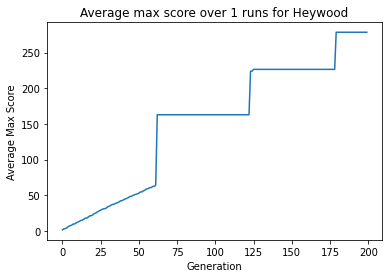

In [9]:
#fitness curves
x = []
y = []
average_maxes = np.zeros(numGens)
# average_maxes = np.zeros(100)

for i in range(len(gens)):
    for q in range(len(runs_score_track)):
        average_maxes[i] += runs_score_track[q]['maxes'][i]
    average_maxes[i] /= len(runs_score_track)
    
for gen in gens:
    x.append(gen)

plt.title(f'Average max score over {len(runs_score_track)} runs for {envName}')
plt.xlabel('Generation')
plt.ylabel('Average Max Score')
plt.plot(x, average_maxes)
plt.show()

## Reinforcement Learning + Victory Lap

In [10]:
print(run_winners)
for learner in team.learners:
    print(learner.program.rule.region)

[{'run': 0, 'winners': [<qtpg.team.Team object at 0x7f891b784160>, <qtpg.team.Team object at 0x7f891b8ee640>, <qtpg.team.Team object at 0x7f891b78dfd0>, <qtpg.team.Team object at 0x7f891b9ae5b0>, <qtpg.team.Team object at 0x7f891b99afd0>]}]
[0, 0, 0, 0]
[0, 0, 2, 9]
[1, 1, 1, 9]
[0, 0, 0, 8]
[1, 9, 0, 7]
[1, 9, 9, 9]
[0, 8, 0, 0]
[0, 8, 2, 9]
[1, 1, 1, 9]
[0, 0, 0, 7]
[0, 0, 9, 9]
[1, 8, 0, 2]
[1, 8, 4, 9]
[0, 3, 3, 7]
[0, 3, 9, 9]
[1, 8, 1, 9]
[0, 0, 0, 6]
[0, 0, 8, 9]
[1, 7, 0, 1]
[1, 7, 3, 9]
[0, 2, 7, 8]
[1, 9, 1, 9]
[0, 0, 0, 2]
[0, 0, 4, 9]
[1, 3, 1, 1]
[0, 0, 0, 8]
[1, 9, 0, 7]
[1, 9, 9, 9]
[0, 8, 0, 8]
[1, 9, 0, 0]
[1, 9, 2, 9]
[0, 1, 1, 9]
[1, 0, 0, 7]
[1, 0, 9, 9]
[0, 8, 0, 3]
[0, 8, 5, 9]
[1, 4, 8, 8]
[0, 9, 1, 9]
[1, 0, 0, 6]
[1, 0, 8, 9]
[0, 7, 0, 0]
[1, 1, 0, 7]
[1, 1, 9, 9]
[0, 8, 0, 4]
[0, 8, 6, 9]
[1, 5, 8, 8]
[0, 9, 0, 1]
[0, 9, 3, 9]
[1, 2, 8, 8]
[0, 9, 0, 6]
[0, 9, 8, 9]
[1, 7, 0, 7]
[1, 7, 9, 9]
[0, 8, 0, 2]
[0, 8, 4, 9]
[1, 3, 9, 9]
[0, 8, 0, 0]
[0, 8, 2, 9]
[1, 1

In [11]:
# team = searchManager.winners[0]
team = run_winners[0]['winners'][0]
team.discount = 0.9
team.alpha = 0.5
# for learner in team.learners:
#     print(learner.program.rule.region)

team.prune_single_cell_regions()
# team.prune_duplicate_regions()

for i in range(env.rows):
#     print(f'Epoch: {i+1} --------')
    env.reset()
#     print(f'curr -> {env.current_state}')
    win = False
    selected_learner = team.select_learner(env, [0, 0, 0, 0])
    while not win:
        win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
#         print(reward)
#         print('hi')
        if not win:
            selected_learner = team.select_learner(env, selected_learner.program.rule.region)
            team.transition_update(reward, winning_action, needs_update, selected_learner)
            rl_query_env += 1

    team.final_update(reward, winning_action, needs_update)

print(win)
for learner in team.learners:
    print(f'{learner.program.rule.region}')
    for i in range(len(learner.program.rule.action_set)):
          print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

PRUNING SINGLE CELL REGIONS!
87
67
regions --> [0, 0, 0, 0] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 4, 9]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 4, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 1, 9] --> [2, 3]
we chose --> [0, 0, 4, 9]
value set is 0, action selected --> 3
[0, 0, 4, 9]
[2, 3]
[0, 0]
3
(0, 3)
Winning action: 3
regions --> [0, 0, 4, 9] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 

(8, 3)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 2)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 1)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 2
[0, 8, 0, 4]
[2, 3]
[0, 0]
2
(8, 1)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 3
[0, 8, 0, 4]
[2, 3]
[0, 0]
3
(8, 0)
value set is 0, action selected --> 2
[0, 8, 0, 4]
[2, 3]
[0, 0]
2
(8, 1)
value set is 0, action selected --> 2
[0, 8, 0, 4]
[2, 3]
[0, 0]
2
(8, 2)
value set is 0, action selected --> 2
[0, 8, 0, 4]
[2, 3]
[0, 0]
2
(8, 3)
value set is 0, action selected

[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 0)
Winning action: 3
regions --> [0, 9, 1, 9] is eligible with [1, 0, 8, 9]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 1]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 6]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 6]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
[1, 0, 8, 9] --> [0, 1]
[0, 9, 0, 1] --> [2, 3]
[0, 9, 0, 6] --> [2, 3]
[0, 9, 0, 6] --> [2, 3]
[1, 0, 7, 9] --> [0, 1]
[1, 0, 7, 9] --> [0, 1]
we chose --> [0, 9, 0, 1]
value set is 0, action selected --> 2
[0, 9, 0, 1]
[2, 3]
[0, 0]
2
(9, 1)
value set is 0, action selected --> 3
[0, 9, 0, 1]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 1]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 1]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 1]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 2
[0, 9, 0, 1]
[2, 3]
[0, 0]
2
(9, 1)
va

value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(2, 9)
value set is 0, action selected --> 1
[1, 9, 0, 7]
[0, 1]
[0, 0]
1
(1, 9)
value set is 0, action selected --> 1
[1, 9, 0, 7]
[0, 1]
[0, 0]
1
(0, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(1, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(2, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(3, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(4, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(5, 9)
value set is 0, action selected --> 1
[1, 9, 0, 7]
[0, 1]
[0, 0]
1
(4, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(5, 9)
value set is 0, action selected --> 1
[1, 9, 0, 7]
[0, 1]
[0, 0]
1
(4, 9)
value set is 0, action selected --> 1
[1, 9, 0, 7]
[0, 1]
[0, 0]
1
(3, 9)
value set is 0, action selected --> 0
[1, 9, 0, 7]
[0, 1]
[0, 0]
0
(4, 9)
value set is 0, action selected --> 1


[2, 3]
[0.07, 0]
2
(0, 2)
[0, 0, 0, 6]
[2, 3]
[0.07, 0]
2
(0, 3)
[0, 0, 0, 6]
[2, 3]
[0.07, 0]
2
(0, 4)
[0, 0, 0, 6]
[2, 3]
[0.07, 0]
2
(0, 5)
[0, 0, 0, 6]
[2, 3]
[0.07, 0]
2
(0, 6)
[0, 0, 0, 6]
[2, 3]
[0.07, 0]
2
(0, 7)
Winning action: 2
regions --> [0, 0, 0, 6] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 0, 6] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 6] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 1]
regions --> [0, 0, 0, 6] is eligible with [0, 0, 4, 9]
regions --> [0, 0, 0, 6] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 7]
regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 4]
regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 6]
regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 1]
regions --> [0, 0, 0, 6] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[1, 7, 0, 1] --> [0, 1]
[0, 0, 4, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 7, 0, 7]

regions --> [0, 8, 0, 8] is eligible with [0, 8, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 1, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 5, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 6, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 4, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 1, 9]
[0, 8, 2, 9] --> [2, 3]
[1, 9, 1, 9] --> [0, 1]
[1, 9, 2, 9] --> [0, 1]
[0, 8, 5, 9] --> [2, 3]
[0, 8, 6, 9] --> [2, 3]
[0, 8, 4, 9] --> [2, 3]
[0, 8, 2, 9] --> [2, 3]
[1, 9, 2, 9] --> [0, 1]
[1, 9, 1, 9] --> [0, 1]
we chose --> [1, 9, 2, 9]
[1, 9, 2, 9]
[0, 1]
[0, 0.05]
1
(7, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.05]
1
(6, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.05]
1
(5, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.05]
1
(4, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.05]
1
(3, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.05]
1
(2, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.05]

(2, 7)
Winning action: 0
regions --> [1, 7, 0, 1] is eligible with [0, 2, 7, 8]
regions --> [1, 7, 0, 1] is eligible with [1, 7, 0, 7]
regions --> [1, 7, 0, 1] is eligible with [1, 7, 0, 4]
regions --> [1, 7, 0, 1] is eligible with [1, 7, 0, 6]
regions --> [1, 7, 0, 1] is eligible with [0, 2, 7, 8]
[0, 2, 7, 8] --> [2, 3]
[1, 7, 0, 7] --> [0, 1]
[1, 7, 0, 4] --> [0, 1]
[1, 7, 0, 6] --> [0, 1]
[0, 2, 7, 8] --> [2, 3]
we chose --> [1, 7, 0, 7]
[1, 7, 0, 7]
[0, 1]
[0.08000000000000002, 0]
0
(3, 7)
[1, 7, 0, 7]
[0, 1]
[0.08000000000000002, 0]
0
(4, 7)
[1, 7, 0, 7]
[0, 1]
[0.08000000000000002, 0]
0
(5, 7)
[1, 7, 0, 7]
[0, 1]
[0.08000000000000002, 0]
0
(6, 7)
[1, 7, 0, 7]
[0, 1]
[0.08000000000000002, 0]
0
(7, 7)
[1, 7, 0, 7]
[0, 1]
[0.08000000000000002, 0]
0
(8, 7)
Winning action: 0
regions --> [1, 7, 0, 7] is eligible with [0, 8, 2, 9]
regions --> [1, 7, 0, 7] is eligible with [1, 7, 3, 9]
regions --> [1, 7, 0, 7] is eligible with [0, 8, 0, 8]
regions --> [1, 7, 0, 7] is eligible with [0, 8

regions --> [0, 8, 5, 9] is eligible with [0, 8, 4, 9]
regions --> [0, 8, 5, 9] is eligible with [0, 8, 2, 9]
[0, 8, 2, 9] --> [2, 3]
[0, 8, 0, 8] --> [2, 3]
[0, 8, 0, 4] --> [2, 3]
[0, 8, 4, 9] --> [2, 3]
[0, 8, 2, 9] --> [2, 3]
we chose --> [0, 8, 2, 9]
[0, 8, 2, 9]
[2, 3]
[0, 0.14703125]
3
(8, 3)
[0, 8, 2, 9]
[2, 3]
[0, 0.14703125]
3
(8, 2)
[0, 8, 2, 9]
[2, 3]
[0, 0.14703125]
3
(8, 1)
Winning action: 3
regions --> [0, 8, 2, 9] is eligible with [1, 1, 1, 9]
regions --> [0, 8, 2, 9] is eligible with [1, 1, 1, 9]
regions --> [0, 8, 2, 9] is eligible with [0, 8, 0, 8]
regions --> [0, 8, 2, 9] is eligible with [0, 8, 0, 3]
regions --> [0, 8, 2, 9] is eligible with [0, 8, 0, 4]
regions --> [0, 8, 2, 9] is eligible with [0, 8, 0, 2]
regions --> [0, 8, 2, 9] is eligible with [1, 1, 0, 8]
regions --> [0, 8, 2, 9] is eligible with [1, 1, 8, 9]
[1, 1, 1, 9] --> [0, 1]
[1, 1, 1, 9] --> [0, 1]
[0, 8, 0, 8] --> [2, 3]
[0, 8, 0, 3] --> [2, 3]
[0, 8, 0, 4] --> [2, 3]
[0, 8, 0, 2] --> [2, 3]
[1, 1, 

(9, 0)
value set is 0, action selected --> 2
[0, 9, 0, 6]
[2, 3]
[0, 0]
2
(9, 1)
value set is 0, action selected --> 2
[0, 9, 0, 6]
[2, 3]
[0, 0]
2
(9, 2)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 1)
value set is 0, action selected --> 2
[0, 9, 0, 6]
[2, 3]
[0, 0]
2
(9, 2)
value set is 0, action selected --> 2
[0, 9, 0, 6]
[2, 3]
[0, 0]
2
(9, 3)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 2)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 1)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 3
[0, 9, 0, 6]
[2, 3]
[0, 0]
3
(9, 0)
value set is 0, action selected --> 2
[0, 9, 0, 6]
[2, 3]
[0, 0]
2
(9, 1)
value set is 0, action selected

1
(0, 7)
value set is 0, action selected --> 1
[1, 7, 0, 1]
[0, 1]
[0, 0]
1
(0, 7)
value set is 0, action selected --> 1
[1, 7, 0, 1]
[0, 1]
[0, 0]
1
(0, 7)
value set is 0, action selected --> 0
[1, 7, 0, 1]
[0, 1]
[0, 0]
0
(1, 7)
value set is 0, action selected --> 0
[1, 7, 0, 1]
[0, 1]
[0, 0]
0
(2, 7)
Winning action: 0
regions --> [1, 7, 0, 1] is eligible with [0, 2, 7, 8]
regions --> [1, 7, 0, 1] is eligible with [1, 7, 0, 7]
regions --> [1, 7, 0, 1] is eligible with [1, 7, 0, 4]
regions --> [1, 7, 0, 1] is eligible with [1, 7, 0, 6]
regions --> [1, 7, 0, 1] is eligible with [0, 2, 7, 8]
[0, 2, 7, 8] --> [2, 3]
[1, 7, 0, 7] --> [0, 1]
[1, 7, 0, 4] --> [0, 1]
[1, 7, 0, 6] --> [0, 1]
[0, 2, 7, 8] --> [2, 3]
we chose --> [0, 2, 7, 8]
[0, 2, 7, 8]
[2, 3]
[0.09443750000000001, 0]
2
(2, 8)
[0, 2, 7, 8]
[2, 3]
[0.09443750000000001, 0]
2
(2, 9)
Winning action: 2
regions --> [0, 2, 7, 8] is eligible with [1, 9, 0, 7]
regions --> [0, 2, 7, 8] is eligible with [1, 9, 1, 9]
regions --> [0, 2, 7

[0, 0.13480000000000003]
1
(0, 1)
Winning action: 1
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 6]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 2]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 1, 9]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 6]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 2] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 1, 0, 7] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[0, 0, 1, 9] --> [2, 3]
[1, 1, 0, 6] --> [0, 1]
we chose --> [0, 0, 1, 9]
[0, 0, 1, 9]
[2, 3]
[0, 0.09187500000000001]
3
(0, 0)
Winning action: 3
regions --> [0, 0, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 1, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 1, 9] is e

[1, 9, 0, 7] --> [0, 1]
[0, 0, 8, 9] --> [2, 3]
[0, 0, 4, 9] --> [2, 3]
[1, 9, 0, 7] --> [0, 1]
[0, 0, 1, 9] --> [2, 3]
we chose --> [0, 0, 2, 9]
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 8)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 7)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 6)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 5)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 4)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 3)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 2)
[0, 0, 2, 9]
[2, 3]
[0, 0.22620102821359256]
3
(0, 1)
Winning action: 3
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 2]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 7]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 

3
(0, 5)
[0, 0, 4, 9]
[2, 3]
[0, 0.15388331367187502]
3
(0, 4)
[0, 0, 4, 9]
[2, 3]
[0, 0.15388331367187502]
3
(0, 3)
Winning action: 3
regions --> [0, 0, 4, 9] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 1, 9] --> [2, 3]
we chose --> [0, 0, 0, 7]
[0, 0, 0, 7]
[2, 3]
[0.2602985915749924, 0]
2
(0, 4)
[0, 0, 0, 7]
[2, 3]
[0.2602985915749924, 0]
2
(0, 5)
[0, 0, 0, 7]
[2, 3]
[0.2602985915749924, 0]
2
(0, 6)
[0, 0, 0, 7]
[2, 3]
[0.2602985915749924, 0]
2
(0, 7)
[0, 0, 0, 7]
[2, 3]
[0.2602985915749924, 0]
2
(0, 8)
Winning action: 2
regions --> [0, 0, 0, 7] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 0, 7] is

[1, 1, 8, 9] --> [0, 1]
we chose --> [1, 1, 1, 9]
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(7, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(6, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(5, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
0
(6, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(5, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(4, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(3, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(2, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(1, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.34042329660223725]
1
(0, 1)
Winning action: 1
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 6]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 2]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 8]
regions

2
(8, 9)
Winning action: 2
regions --> [0, 8, 0, 8] is eligible with [0, 8, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 1, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 5, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 6, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 4, 9]
regions --> [0, 8, 0, 8] is eligible with [0, 8, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 2, 9]
regions --> [0, 8, 0, 8] is eligible with [1, 9, 1, 9]
[0, 8, 2, 9] --> [2, 3]
[1, 9, 1, 9] --> [0, 1]
[1, 9, 2, 9] --> [0, 1]
[0, 8, 5, 9] --> [2, 3]
[0, 8, 6, 9] --> [2, 3]
[0, 8, 4, 9] --> [2, 3]
[0, 8, 2, 9] --> [2, 3]
[1, 9, 2, 9] --> [0, 1]
[1, 9, 1, 9] --> [0, 1]
we chose --> [1, 9, 2, 9]
[1, 9, 2, 9]
[0, 1]
[0, 0.1434464831298828]
1
(7, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.1434464831298828]
1
(6, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.1434464831298828]
1
(5, 9)
[1, 9, 2, 9]
[0, 1]
[0, 0.1434464831298828]
0
(6, 9)
[1, 9, 2, 9]
[0, 1]
[0, 

[0, 0.37226722134234475]
3
(0, 6)
[0, 0, 4, 9]
[2, 3]
[0, 0.37226722134234475]
3
(0, 5)
[0, 0, 4, 9]
[2, 3]
[0, 0.37226722134234475]
3
(0, 4)
[0, 0, 4, 9]
[2, 3]
[0, 0.37226722134234475]
3
(0, 3)
Winning action: 3
regions --> [0, 0, 4, 9] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 4, 9] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 1, 9] --> [2, 3]
we chose --> [0, 0, 0, 8]
[0, 0, 0, 8]
[2, 3]
[0.2983068474324442, 0]
2
(0, 4)
[0, 0, 0, 8]
[2, 3]
[0.2983068474324442, 0]
2
(0, 5)
[0, 0, 0, 8]
[2, 3]
[0.2983068474324442, 0]
2
(0, 6)
[0, 0, 0, 8]
[2, 3]
[0.2983068474324442, 0]
2
(0, 7)
[0, 0, 0, 8]
[2, 3]
[0.2983068474324442, 0]
2
(0, 8)
[0, 0, 0, 8]
[2, 3]
[

regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 6]
regions --> [0, 0, 0, 6] is eligible with [1, 7, 0, 1]
regions --> [0, 0, 0, 6] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[1, 7, 0, 1] --> [0, 1]
[0, 0, 4, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 7, 0, 7] --> [0, 1]
[1, 7, 0, 4] --> [0, 1]
[1, 7, 0, 6] --> [0, 1]
[1, 7, 0, 1] --> [0, 1]
[0, 0, 1, 9] --> [2, 3]
we chose --> [0, 0, 0, 7]
[0, 0, 0, 7]
[2, 3]
[2.3978301317942825, 0]
2
(0, 8)
Winning action: 2
regions --> [0, 0, 0, 7] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 7] is eligible with [1, 8, 0, 2]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 8, 9]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 4, 9]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 8, 0, 2] --> [0, 1]
[0, 0, 8, 9] --> 

1
(5, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.33846526232262264]
1
(4, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.33846526232262264]
1
(3, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.33846526232262264]
1
(2, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.33846526232262264]
1
(1, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.33846526232262264]
1
(0, 1)
Winning action: 1
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 6]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 2]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 1, 9]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 6]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 2] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 1, 0, 7] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[0, 0, 1, 9] --> [2, 3]
[1, 1, 0, 6] -->

[0, 1]
[0.4039810077405518, 0]
0
(5, 1)
[1, 1, 0, 6]
[0, 1]
[0.4039810077405518, 0]
0
(6, 1)
[1, 1, 0, 6]
[0, 1]
[0.4039810077405518, 0]
0
(7, 1)
Winning action: 0
regions --> [1, 1, 0, 6] is eligible with [1, 1, 1, 9]
regions --> [1, 1, 0, 6] is eligible with [1, 1, 1, 9]
regions --> [1, 1, 0, 6] is eligible with [1, 1, 0, 7]
regions --> [1, 1, 0, 6] is eligible with [1, 1, 0, 8]
[1, 1, 1, 9] --> [0, 1]
[1, 1, 1, 9] --> [0, 1]
[1, 1, 0, 7] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
we chose --> [1, 1, 1, 9]
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(6, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(5, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(4, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(3, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(2, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(1, 1)
[1, 1, 1, 9]
[0, 1]
[0, 0.8871724786127145]
1
(0, 1)
Winning action: 1
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0

(3, 7)
[1, 7, 0, 4]
[0, 1]
[0.42257380828985125, 0]
0
(4, 7)
[1, 7, 0, 4]
[0, 1]
[0.42257380828985125, 0]
0
(5, 7)
Winning action: 0
regions --> [1, 7, 0, 4] is eligible with [1, 7, 3, 9]
regions --> [1, 7, 0, 4] is eligible with [1, 7, 0, 7]
regions --> [1, 7, 0, 4] is eligible with [1, 7, 0, 6]
regions --> [1, 7, 0, 4] is eligible with [1, 7, 3, 9]
[1, 7, 3, 9] --> [0, 1]
[1, 7, 0, 7] --> [0, 1]
[1, 7, 0, 6] --> [0, 1]
[1, 7, 3, 9] --> [0, 1]
we chose --> [1, 7, 3, 9]
[1, 7, 3, 9]
[0, 1]
[0, 0.3761790710034669]
1
(4, 7)
[1, 7, 3, 9]
[0, 1]
[0, 0.3761790710034669]
1
(3, 7)
[1, 7, 3, 9]
[0, 1]
[0, 0.3761790710034669]
1
(2, 7)
Winning action: 1
regions --> [1, 7, 3, 9] is eligible with [0, 2, 7, 8]
regions --> [1, 7, 3, 9] is eligible with [1, 7, 0, 7]
regions --> [1, 7, 3, 9] is eligible with [1, 7, 0, 4]
regions --> [1, 7, 3, 9] is eligible with [1, 7, 0, 6]
regions --> [1, 7, 3, 9] is eligible with [0, 2, 7, 8]
[0, 2, 7, 8] --> [2, 3]
[1, 7, 0, 7] --> [0, 1]
[1, 7, 0, 4] --> [0, 1]
[

regions --> [0, 0, 0, 2] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 0, 2] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 0, 2] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 2] is eligible with [0, 0, 1, 9]
[0, 0, 2, 9] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 1, 9] --> [2, 3]
we chose --> [0, 0, 0, 7]
[0, 0, 0, 7]
[2, 3]
[1.1519042261065555, 0]
2
(0, 4)
[0, 0, 0, 7]
[2, 3]
[1.1519042261065555, 0]
2
(0, 5)
[0, 0, 0, 7]
[2, 3]
[1.1519042261065555, 0]
2
(0, 6)
[0, 0, 0, 7]
[2, 3]
[1.1519042261065555, 0]
2
(0, 7)
[0, 0, 0, 7]
[2, 3]
[1.1519042261065555, 0]
2
(0, 8)
Winning action: 2
regions --> [0, 0, 0, 7] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 7] is eligible with [1, 8, 0, 2]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 8, 9]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 4, 9]
regions --> [0, 0, 0, 7] is eligible with [0, 0, 0, 

[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
3
(9, 0)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 1)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 2)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 3)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 4)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 5)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 6)
[0, 9, 0, 6]
[2, 3]
[0.23920115092773442, 0]
2
(9, 7)
Winning action: 2
regions --> [0, 9, 0, 6] is eligible with [1, 7, 3, 9]
regions --> [0, 9, 0, 6] is eligible with [0, 9, 1, 9]
regions --> [0, 9, 0, 6] is eligible with [0, 9, 3, 9]
regions --> [0, 9, 0, 6] is eligible with [1, 7, 6, 9]
regions --> [0, 9, 0, 6] is eligible with [1, 7, 8, 9]
regions --> [0, 9, 0, 6] is eligible with [1, 7, 3, 9]
[1, 7, 3, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 3, 9] --> [2, 3]
[1, 7, 6, 9] --> [0, 1]
[1, 7, 8, 9] --> [0, 1]
[1, 7, 3, 9] --> [0, 1]
we chose --> [1, 7, 3, 9]
[1, 7, 3, 9]
[0, 1]
[0, 0.4916485328531606]
1
(8, 

0
(1, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(2, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(3, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(4, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(5, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(6, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(7, 9)
[1, 9, 0, 7]
[0, 1]
[0.5734377405958984, 0]
0
(8, 9)
Winning action: 0
regions --> [1, 9, 0, 7] is eligible with [0, 8, 2, 9]
regions --> [1, 9, 0, 7] is eligible with [1, 9, 1, 9]
regions --> [1, 9, 0, 7] is eligible with [1, 9, 2, 9]
regions --> [1, 9, 0, 7] is eligible with [0, 8, 5, 9]
regions --> [1, 9, 0, 7] is eligible with [0, 8, 6, 9]
regions --> [1, 9, 0, 7] is eligible with [0, 8, 4, 9]
regions --> [1, 9, 0, 7] is eligible with [0, 8, 2, 9]
regions --> [1, 9, 0, 7] is eligible with [1, 9, 2, 9]
regions --> [1, 9, 0, 7] is eligible with [1, 9, 1, 9]
[0, 8, 2, 9] --> [2, 3]
[1, 9, 1, 9] --> [0, 1]
[1, 9, 2, 9] --> [0, 1]
[0, 8, 5, 9] --> [2, 3]
[0, 8, 6, 9

[0, 0, 2, 9]
[2, 3]
[0, 1.3794323591339765]
3
(0, 6)
[0, 0, 2, 9]
[2, 3]
[0, 1.3794323591339765]
3
(0, 5)
[0, 0, 2, 9]
[2, 3]
[0, 1.3794323591339765]
3
(0, 4)
[0, 0, 2, 9]
[2, 3]
[0, 1.3794323591339765]
3
(0, 3)
[0, 0, 2, 9]
[2, 3]
[0, 1.3794323591339765]
3
(0, 2)
[0, 0, 2, 9]
[2, 3]
[0, 1.3794323591339765]
3
(0, 1)
Winning action: 3
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 2]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 7]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 1, 9]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 6]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 2] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 1, 0, 7] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[

regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 6]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 2]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 7]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 8]
regions --> [1, 1, 1, 9] is eligible with [0, 0, 1, 9]
regions --> [1, 1, 1, 9] is eligible with [1, 1, 0, 6]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 2] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 1, 0, 7] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[0, 0, 1, 9] --> [2, 3]
[1, 1, 0, 6] --> [0, 1]
we chose --> [0, 0, 0, 8]
[0, 0, 0, 8]
[2, 3]
[2.083348813194265, 0]
2
(0, 2)
[0, 0, 0, 8]
[2, 3]
[2.083348813194265, 0]
2
(0, 3)
[0, 0, 0, 8]
[2, 3]
[2.083348813194265, 0]
2
(0, 4)
[0, 0, 0, 8]
[2, 3]
[2.083348813194265, 0]
2
(0, 5)
[0, 0, 0, 8]
[2, 3]
[2.083348813194265, 0]
2
(0, 6)
[0,

regions --> [1, 1, 0, 8] is eligible with [0, 9, 0, 6]
regions --> [1, 1, 0, 8] is eligible with [0, 9, 0, 6]
regions --> [1, 1, 0, 8] is eligible with [1, 1, 8, 9]
[1, 1, 1, 9] --> [0, 1]
[1, 1, 1, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 1] --> [2, 3]
[0, 9, 0, 6] --> [2, 3]
[0, 9, 0, 6] --> [2, 3]
[1, 1, 8, 9] --> [0, 1]
we chose --> [0, 9, 1, 9]
[0, 9, 1, 9]
[2, 3]
[0, 0.25289983241512765]
3
(9, 0)
Winning action: 3
regions --> [0, 9, 1, 9] is eligible with [1, 0, 8, 9]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 1]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 6]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 6]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
[1, 0, 8, 9] --> [0, 1]
[0, 9, 0, 1] --> [2, 3]
[0, 9, 0, 6] --> [2, 3]
[0, 9, 0, 6] --> [2, 3]
[1, 0, 7, 9] --> [0, 1]
[1, 0, 7, 9] --> [0, 1]
we chose --> [0, 9, 0, 6]
[0, 9, 0, 6]
[2, 3]
[0.4582188837669974, 0]
2
(9, 1)
[0, 9, 0, 6]
[2,

[0.829999374577386, 0]
0
(6, 0)
Winning action: 0
regions --> [1, 0, 0, 5] is eligible with [1, 0, 0, 7]
regions --> [1, 0, 0, 5] is eligible with [1, 0, 0, 6]
regions --> [1, 0, 0, 5] is eligible with [0, 6, 0, 3]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 0, 6] --> [0, 1]
[0, 6, 0, 3] --> [2, 3]
we chose --> [0, 6, 0, 3]
[0, 6, 0, 3]
[2, 3]
[42.44994887772776, 0]
2
(6, 1)
[0, 6, 0, 3]
[2, 3]
[42.44994887772776, 0]
2
(6, 2)
[0, 6, 0, 3]
[2, 3]
[42.44994887772776, 0]
2
(6, 3)
[0, 6, 0, 3]
[2, 3]
[42.44994887772776, 0]
2
(6, 4)
Winning action: 2
regions --> [0, 6, 0, 3] is eligible with [0, 6, 2, 4]
regions --> [0, 6, 0, 3] is eligible with [1, 4, 4, 6]
[0, 6, 2, 4] --> [2, 3]
[1, 4, 4, 6] --> [0, 1]
we chose --> [1, 4, 4, 6]
[1, 4, 4, 6]
[0, 1]
[0, 99.31796874999999]
1
(5, 4)
[1, 4, 4, 6]
[0, 1]
[0, 99.31796874999999]
1
(4, 4)
Winning action: 1
win!
regions --> [0, 0, 0, 0] is eligible with [0, 0, 2, 9]
regions --> [0, 0, 0, 0] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 0, 0] is eligible wit

[0, 0, 2, 9]
[2, 3]
[0, 0.8884372375798284]
3
(0, 2)
[0, 0, 2, 9]
[2, 3]
[0, 0.8884372375798284]
3
(0, 1)
Winning action: 3
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 7]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 6]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 2]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 7]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 2, 9] is eligible with [0, 0, 1, 9]
regions --> [0, 0, 2, 9] is eligible with [1, 1, 0, 6]
[0, 0, 0, 8] --> [2, 3]
[0, 0, 0, 7] --> [2, 3]
[0, 0, 0, 6] --> [2, 3]
[0, 0, 0, 2] --> [2, 3]
[0, 0, 0, 8] --> [2, 3]
[1, 1, 0, 7] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[0, 0, 1, 9] --> [2, 3]
[1, 1, 0, 6] --> [0, 1]
we chose --> [1, 1, 0, 7]
[1, 1, 0, 7]
[0, 1]
[0.7890041499341961, 0]
0
(1, 1)
[1, 1, 0, 7]
[0, 1]
[0.7890041499341961, 0]
0
(2, 1)
[1, 1, 0, 7]
[0, 1]
[0.7890041499

## State Action Map (RL)

↓ ↓ → → → → → ↓ ↓ ↓ 

↓ ↓ → → → → → → → ↓ 

↓ ↓ X X X X X → → ↓ 

→ → → → ↓ ? X ↓ ↓ ↓ 

↑ ↓ ? ? ↓ ? X ↓ ↓ ↓ 

↑ ↓ X ? ↓ ? X ↓ ↓ ↓ 

↑ ↓ X ← ← ← ← ↓ ↓ ↓ 

↑ ↓ X X X X X → → ↓ 

↑ ↓ → → → → → ↑ ↓ ↑ 

↑ ← ← ← ← ← ← ← ← ← 



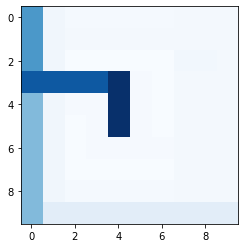

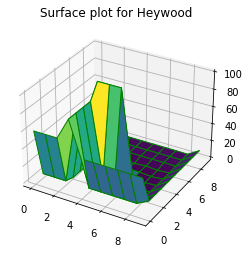

In [12]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
# print(sorted_region_action_scores)
# for record in sorted_region_action_scores:
#     print(record)
action_states = []
for record in sorted_region_action_scores:
    action = ''
    if record['action'] == 0:
        action = '\u2191'
    elif record['action'] == 1:
        action = '\u2193'
    elif record['action'] == 2:
        action = '\u2192'
    elif record['action'] == 3:
        action = '\u2190'

    for i in range(record['region'][3] - record['region'][2]+1):
        state = [0, 0]
        state[record['region'][0]] = record['region'][1]
        state[not record['region'][0]] = record['region'][2] + i
        
        # ensure we do not enter duplicate states
        found = 0
        for pair in action_states:
            if pair['state'] == (state[0], state[1]):
                found = 1
                
        if found == 0:
            action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

# add in the rest of the states, either they are not visited, or illegal
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['action']
#                 action = float(round(record['q'], 0))
        if found == 0:
            if not env.check_legal((n, m)):
                action = 'X'
            else:
                action = '?'
        print(f'{action} ', end='')
    print('\n')
    

q_map = np.zeros((env.rows, env.cols))

# add in the rest of the states, either they are not visited, or illegal
for n in range(env.rows):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['q']
        if found == 0:
            if not env.check_legal((n, m)):
                action = -1
            else:
                action = 0
        q_map[(env.rows-1)-n][m] = action

plt.imshow(q_map, cmap='Blues', interpolation='nearest')
plt.show()

x = []
y = []
for i in range(env.cols):
    x.append(i)
    y.append(i)

Y, X = np.meshgrid(x, y)

fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')

# syntax for plotting
ax.plot_surface(X, Y, q_map, cmap ='viridis', edgecolor ='green')
ax.set_title(f'Surface plot for {envName}')
plt.show()

## Heatmap (RL)

In [13]:
region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)

state_counts = []

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        state_count = 0
        for record in sorted_region_action_scores:
            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i

                if state == [n, m]:
                    state_count += 1
                # state count logic goes here
        state_counts.append({'state': (n, m), 'count': state_count})

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        for record in state_counts:
            if (n, m) == record['state']:
                count = record['count']
                print(f'{count} ', end='')
    print('')

6 7 3 4 4 4 4 6 6 8 
7 8 6 5 5 5 6 10 8 9 
3 4 0 0 0 0 0 5 3 6 
3 6 2 2 2 0 0 5 2 6 
4 5 0 0 1 0 0 4 3 7 
4 5 0 0 1 0 0 5 2 6 
4 5 0 1 1 1 1 6 1 6 
4 5 0 0 0 0 0 5 4 6 
5 7 2 2 2 2 2 6 4 6 
9 9 7 6 7 7 7 11 7 6 


In [14]:
# print(team.gp_query_env)
print(gp_query_env)
print(rl_query_env)

4836
975
